In [2]:
# import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [3]:
# read csv file

# set path
data_path = "../Youtube_Data.csv"
# read data file and store into pandas dataframe
data_df = pd.read_csv(data_path)
# display the dataframe
data_df.head()


# create a clean dataframe by removing 1st unnamed column amd drop missing values
del data_df["Unnamed: 0"]
data_df = data_df.dropna()
# display the updated dataframe
data_df.head()

# merge with category ID
vidcat = [['Category ID', 'category'],
          [1, 'Film & Animation'],
          [2, 'Autos & Vehicles'],
          [10, 'Music'],
          [15, 'Pets & Animals'],
          [17, 'Sports'],
          [18, 'Short Movies'],
          [19, 'Travel & Events'],
          [20, 'Gaming'],
          [21, 'Videoblogging'],
          [22, 'People & Blogs'],
          [23, 'Comedy'],
          [24, 'Entertainment'],
          [25, 'News & Politics'],
          [26, 'Howto & Style'],
          [27, 'Education'],
          [28, 'Science & Technology'],
          [29, 'Nonprofits & Activism'],
          [30, 'Movies'],
          [31, 'Anime/Animation'],
          [32, 'Action/Adventure'],
          [33, 'Classics'],
          [34, 'Comedy'],
          [35, 'Documentary'],
          [36, 'Drama'],
          [37, 'Family'],
          [38, 'Foreign'],
          [39, 'Horror'],
          [40, 'Sci-Fi/Fantasy'],
          [41, 'Thriller'],
          [42, 'Shorts'],
          [43, 'Shows'],
          [44, 'Trailers'],
         ]


df = pd.DataFrame (vidcat, columns = ['Category ID', 'category'])
data_df = data_df.merge(df, how='left', on='Category ID')
data_df.head()

,Region,Category ID,Made For Kids,Channel IDs,View Count,Like Count,Comment Count,Country Name,Region ID,category
0,AE,10,False,UCANLZYMidaCbLQFWXBC95Jg,8723803,907375.0,34269.0,United Arab Emirates,AE,Music
1,AE,24,False,UCvC4D8onUfXzvjTOM-dBfEA,16155641,797863.0,32167.0,United Arab Emirates,AE,Entertainment
2,AE,23,False,UC8-Th83bH_thdKZDJCrn88g,1573681,106091.0,2986.0,United Arab Emirates,AE,Comedy
3,AE,17,False,UCt2JXOLNxqry7B_4rRZME3Q,7870274,321039.0,20645.0,United Arab Emirates,AE,Sports
4,AE,17,False,UCJUCcJUeh0Cz2xyKwkw5Q1w,634870,73362.0,2049.0,United Arab Emirates,AE,Sports


## view/like/comment counts per country

In [4]:
# create dataframe grouped by country
country_grouping = data_df.groupby(["Country Name"]).sum()[["View Count","Like Count", "Comment Count"]]

# calculate percentage of view/like/comment per country
# total_view/like/comment counts
total_view_counts = country_grouping["View Count"].sum()
total_like_counts = country_grouping["Like Count"].sum()
total_Comment_counts = country_grouping["Comment Count"].sum()
# percentage of view/like/comment count
percent_view_counts = country_grouping["View Count"]/total_view_counts*100
percent_like_counts = country_grouping["Like Count"]/total_like_counts*100
percent_comment_counts = country_grouping["Comment Count"]/total_Comment_counts*100

# add percentage data to current groupby dataframe
country_grouping["% View Count"] = percent_view_counts#.map("${:,.2f}".format)
country_grouping["% Like Count"] = percent_like_counts#.map("${:,.2f}".format)
country_grouping["% Comment Count"] = percent_comment_counts#.map("${:,.2f}".format)
country_grouping.head()


,View Count,Like Count,Comment Count,% View Count,% Like Count,% Comment Count
Country Name,,,,,,
Algeria,188625689,11233888.0,486907.0,0.581188,0.707118,0.999821
Argentina,136261307,7730063.0,346566.0,0.419844,0.486569,0.711643
Australia,179304668,10355063.0,548724.0,0.552468,0.651800,1.126757
Austria,132397383,7707799.0,339559.0,0.407939,0.485168,0.697255
Azerbaijan,220262881,6497767.0,110902.0,0.678667,0.409002,0.227728


* ## View count per country

In [5]:
# create dataframe sorted by view counts
# view_count = country_grouping.sort_values("View Count", ascending=False)
view_count = country_grouping.nlargest(10, "View Count") # only show top 10 country otherwise graph is too crowded
view_count

,View Count,Like Count,Comment Count,% View Count,% Like Count,% Comment Count
Country Name,,,,,,
Cambodia,1363515735,49731107.0,406740.0,4.201222,3.130327,0.835205
Malaysia,837597424,39431981.0,557003.0,2.580779,2.482048,1.143758
Sri Lanka,807964965,32013079.0,184376.0,2.489477,2.015065,0.378600
New Zealand,674120730,36935926.0,827172.0,2.077080,2.324934,1.698526
Laos,664405050,26441315.0,174786.0,2.047144,1.664350,0.358908
Kazakhstan,640518334,24179803.0,363356.0,1.973545,1.521999,0.746120
El Salvador,632037709,28275248.0,747426.0,1.947415,1.779787,1.534775
Portugal,618809241,31118941.0,677684.0,1.906656,1.958784,1.391566
Ireland,614195293,35390848.0,819455.0,1.892440,2.227679,1.682680


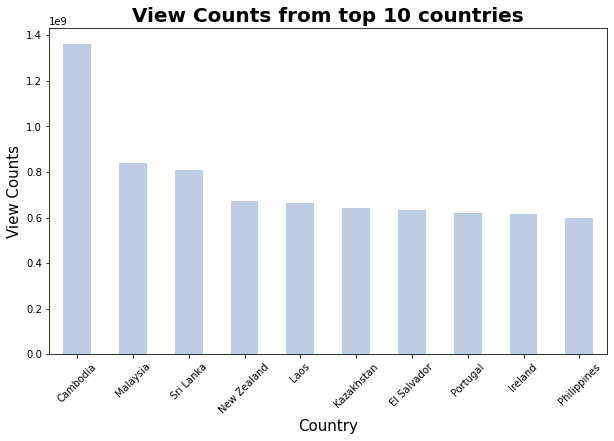

In [6]:
# generate bar plot
view_count["View Count"].plot(kind='bar', figsize=(10, 6),color = 'lightsteelblue', alpha = 0.85)

#rotate x-axis ticks vertically
plt.xticks(fontsize = 10,rotation=45)
plt.yticks(fontsize = 10,rotation=0)
plt.title("View Counts from top 10 countries",fontsize = 20, fontweight = "bold")
plt.xlabel("Country",fontsize = 15)
plt.ylabel("View Counts",fontsize = 15)
plt.rc('font', **{'size':'15'})

# save fig
plt.savefig("Images/View count per country.png")
# display fig
plt.show()

* ## Like count per country

In [7]:
# create dataframe sorted by like counts
# view_count = country_grouping.sort_values("View Count", ascending=False)
like_count = country_grouping.nlargest(10, "Like Count")
like_count

,View Count,Like Count,Comment Count,% View Count,% Like Count,% Comment Count
Country Name,,,,,,
Cambodia,1363515735,49731107.0,406740.0,4.201222,3.130327,0.835205
Malaysia,837597424,39431981.0,557003.0,2.580779,2.482048,1.143758
New Zealand,674120730,36935926.0,827172.0,2.077080,2.324934,1.698526
Ireland,614195293,35390848.0,819455.0,1.892440,2.227679,1.682680
Sri Lanka,807964965,32013079.0,184376.0,2.489477,2.015065,0.378600
Norway,572920914,31873375.0,789059.0,1.765266,2.006271,1.620264
Portugal,618809241,31118941.0,677684.0,1.906656,1.958784,1.391566
Singapore,572295679,30722543.0,648919.0,1.763340,1.933832,1.332499
Finland,530436286,29373216.0,581911.0,1.634364,1.848899,1.194904


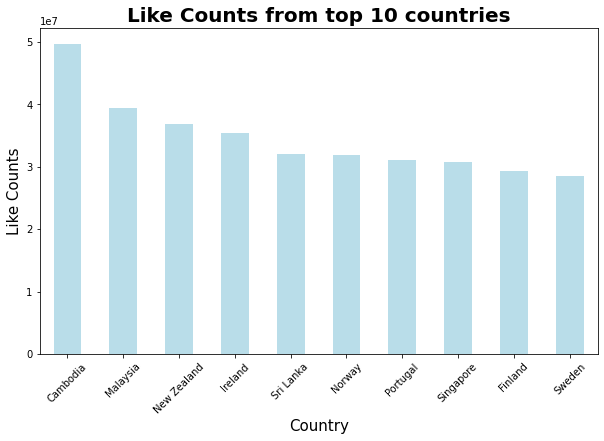

In [10]:
# generate bar plot
like_count["Like Count"].plot(kind='bar', figsize=(10, 6),color = 'lightblue', alpha = 0.85)

#rotate x-axis ticks vertically
plt.xticks(fontsize = 10,rotation=45)
plt.yticks(fontsize = 10,rotation=0)
plt.title("Like Counts from top 10 countries",fontsize = 20, fontweight = "bold")
plt.xlabel("Country",fontsize = 15)
plt.ylabel("Like Counts",fontsize = 15)
plt.rc('font', **{'size':'15'})

# save fig
plt.savefig("Images/Like count per country.png")
# display fig
plt.show()

* ## Comment count per country

In [11]:
# create dataframe sorted by comment counts
# view_count = country_grouping.sort_values("View Count", ascending=False)
comment_count = country_grouping.nlargest(10, "Comment Count")
comment_count

,View Count,Like Count,Comment Count,% View Count,% Like Count,% Comment Count
Country Name,,,,,,
Malta,485849687,25065571.0,1396845.0,1.496985,1.577754,2.868301
Iceland,344999771,21215984.0,1214703.0,1.063003,1.335441,2.494288
Luxembourg,421347136,22491144.0,1160426.0,1.298242,1.415706,2.382835
Estonia,272007017,16348993.0,834342.0,0.838100,1.029088,1.713249
New Zealand,674120730,36935926.0,827172.0,2.077080,2.324934,1.698526
Ireland,614195293,35390848.0,819455.0,1.892440,2.227679,1.682680
Norway,572920914,31873375.0,789059.0,1.765266,2.006271,1.620264
El Salvador,632037709,28275248.0,747426.0,1.947415,1.779787,1.534775
Lithuania,335953464,17380012.0,706333.0,1.035129,1.093986,1.450394


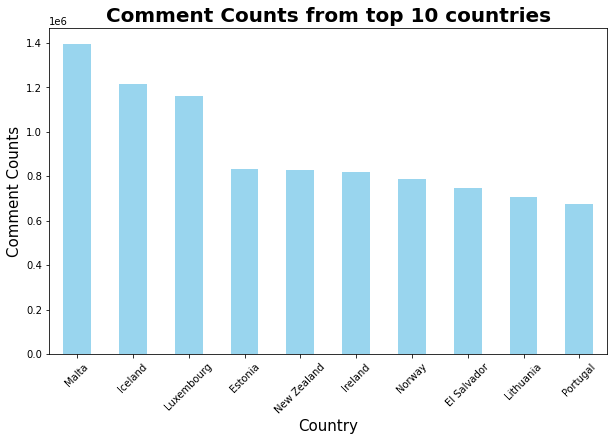

In [14]:
# generate bar plot
comment_count["Comment Count"].plot(kind='bar', figsize=(10, 6),color = 'skyblue', alpha = 0.85)

#rotate x-axis ticks vertically
plt.xticks(fontsize = 10,rotation=45)
plt.yticks(fontsize = 10,rotation=0)
plt.title("Comment Counts from top 10 countries",fontsize = 20, fontweight = "bold")
plt.xlabel("Country",fontsize = 15)
plt.ylabel("Comment Counts",fontsize = 15)
plt.rc('font', **{'size':'15'})

# save fig
plt.savefig("Images/Comment count per country.png")
# display fig
plt.show()

* ## % view count per country

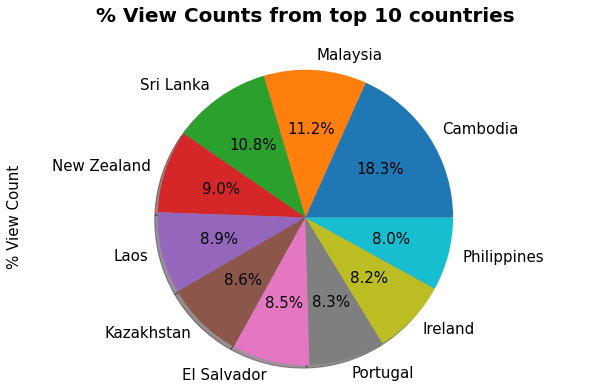

In [15]:
# create dataframe sorted by % view counts
# view_count = country_grouping.sort_values("View Count", ascending=False)
percentage_view_count = country_grouping.nlargest(10, "% View Count")
percentage_view_count

# generate pie chart
percentage_view_count["% View Count"].plot(kind='pie',autopct="%1.1f%%",shadow=True,figsize=(10, 6))
plt.axis('equal')
plt.title("% View Counts from top 10 countries",fontsize = 20, fontweight = "bold", pad = 32)

# save fig
plt.savefig("Images/% View count per country.png")
# display fig
plt.show()


* ## % Like count per country

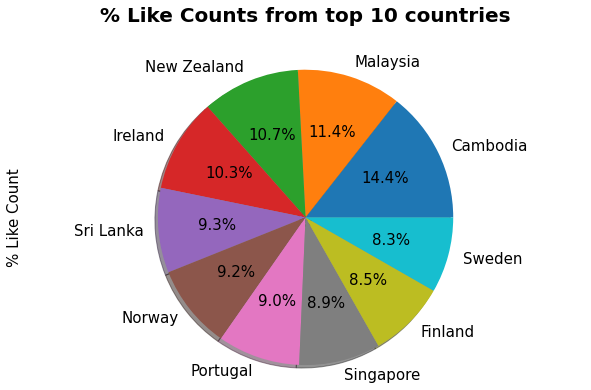

In [16]:
# create dataframe sorted by % like counts
# view_count = country_grouping.sort_values("View Count", ascending=False)
percentage_like_count = country_grouping.nlargest(10, "% Like Count")
percentage_like_count

# generate pie chart
percentage_like_count["% Like Count"].plot(kind='pie',autopct="%1.1f%%",shadow=True,figsize=(10, 6))
plt.axis('equal')
plt.title("% Like Counts from top 10 countries",fontsize = 20, fontweight = "bold", pad = 32)

# save fig
plt.savefig("Images/% Like count per country.png")
# display fig
plt.show()

* ## % Comment count per country

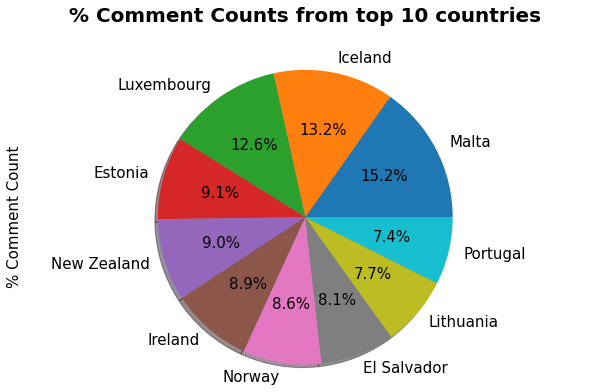

In [17]:
# create dataframe sorted by % comment counts
# view_count = country_grouping.sort_values("View Count", ascending=False)
percentage_comment_count = country_grouping.nlargest(10, "% Comment Count")
percentage_comment_count

# generate pie chart
percentage_comment_count["% Comment Count"].plot(kind='pie',autopct="%1.1f%%",shadow=True,figsize=(10, 6))
plt.axis('equal')
plt.title("% Comment Counts from top 10 countries",fontsize = 20, fontweight = "bold", pad = 32)

# save fig
plt.savefig("Images/% Comment count per country.png")
# display fig
plt.show()

## view/like/comment per category

In [18]:
# create dataframe grouped by category ID
category_grouping = data_df.groupby(["category"]).sum()[["View Count","Like Count", "Comment Count"]]

# calculate percentage of view/like/comment per category
# total_view/like/comment counts
total_view_counts = category_grouping["View Count"].sum()
total_like_counts = category_grouping["Like Count"].sum()
total_Comment_counts = category_grouping["Comment Count"].sum()
# percentage of view/like/comment count
percent_view_counts = category_grouping["View Count"]/total_view_counts*100
percent_like_counts = category_grouping["Like Count"]/total_like_counts*100
percent_comment_counts = category_grouping["Comment Count"]/total_Comment_counts*100

# add percentage data to current groupby dataframe
category_grouping["% View Count"] = percent_view_counts#.map("${:,.2f}".format)
category_grouping["% Like Count"] = percent_like_counts#.map("${:,.2f}".format)
category_grouping["% Comment Count"] = percent_comment_counts#.map("${:,.2f}".format)
category_grouping.head()

,View Count,Like Count,Comment Count,% View Count,% Like Count,% Comment Count
category,,,,,,
Autos & Vehicles,43588986,2189547.0,102370.0,0.134305,0.137821,0.210208
Comedy,1474027074,55607520.0,646987.0,4.541727,3.500219,1.328532
Education,59351110,2856027.0,108738.0,0.182871,0.179773,0.223284
Entertainment,9288456046,535794015.0,13779840.0,28.619303,33.725585,28.295711
Film & Animation,5611784056,216047447.0,2155865.0,17.290855,13.599119,4.426883


* ## View count per category

In [19]:
# create dataframe sorted by view counts
view_count = category_grouping.sort_values("View Count", ascending=False)
# view_count = category_grouping.nlargest(10, "View Count")
view_count

,View Count,Like Count,Comment Count,% View Count,% Like Count,% Comment Count
category,,,,,,
Music,10160411510,508013936.0,18702820.0,31.305946,31.976967,38.404625
Entertainment,9288456046,535794015.0,13779840.0,28.619303,33.725585,28.295711
Film & Animation,5611784056,216047447.0,2155865.0,17.290855,13.599119,4.426883
Sports,1690103561,59911865.0,2093969.0,5.207495,3.771156,4.299784
People & Blogs,1548932469,76105761.0,3962830.0,4.772523,4.790482,8.137329
Comedy,1474027074,55607520.0,646987.0,4.541727,3.500219,1.328532
Gaming,1110358453,71930175.0,4254473.0,3.421202,4.527649,8.736193
Science & Technology,412137771,24706776.0,1420553.0,1.269866,1.555169,2.916983
News & Politics,352451457,12468381.0,1256229.0,1.085963,0.784823,2.579558


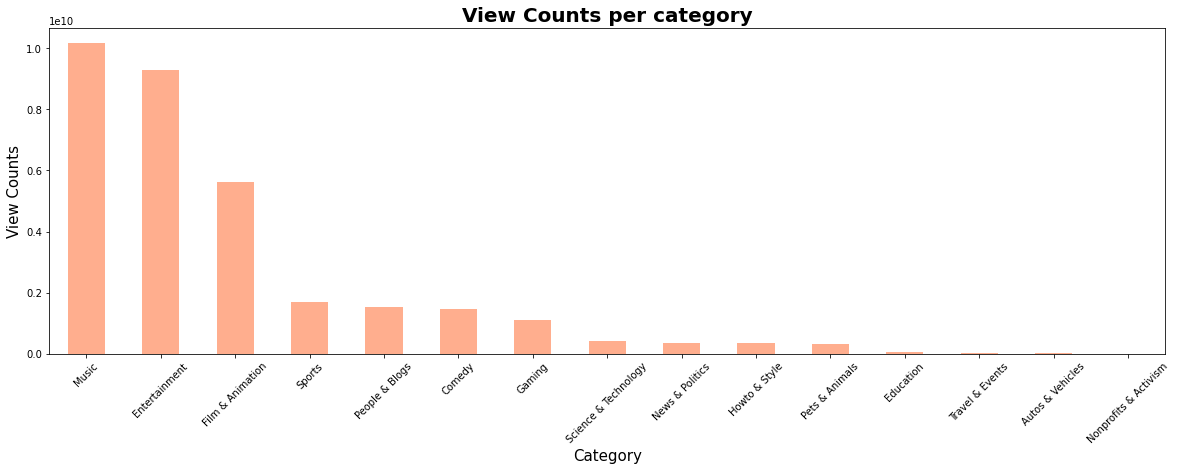

In [22]:
# generate bar plot
view_count["View Count"].plot(kind='bar', figsize=(20, 6),color = 'lightsalmon', alpha = 0.85)
#rotate x-axis ticks vertically
plt.xticks(fontsize = 10,rotation=45)
plt.yticks(fontsize = 10,rotation=0)
plt.title("View Counts per category",fontsize = 20, fontweight = "bold")
plt.xlabel("Category",fontsize = 15)
plt.ylabel("View Counts",fontsize = 15)
plt.rc('font', **{'size':'15'})

# save fig
plt.savefig("Images/View count per category.png")
# display fig
plt.show()

* ## Like count per category

In [23]:
# create dataframe sorted by like counts
like_count = category_grouping.sort_values("Like Count", ascending=False)
# like_count = category_grouping.nlargest(10, "Like Count")
like_count

,View Count,Like Count,Comment Count,% View Count,% Like Count,% Comment Count
category,,,,,,
Entertainment,9288456046,535794015.0,13779840.0,28.619303,33.725585,28.295711
Music,10160411510,508013936.0,18702820.0,31.305946,31.976967,38.404625
Film & Animation,5611784056,216047447.0,2155865.0,17.290855,13.599119,4.426883
People & Blogs,1548932469,76105761.0,3962830.0,4.772523,4.790482,8.137329
Gaming,1110358453,71930175.0,4254473.0,3.421202,4.527649,8.736193
Sports,1690103561,59911865.0,2093969.0,5.207495,3.771156,4.299784
Comedy,1474027074,55607520.0,646987.0,4.541727,3.500219,1.328532
Science & Technology,412137771,24706776.0,1420553.0,1.269866,1.555169,2.916983
Pets & Animals,314853432,12955339.0,11903.0,0.970117,0.815475,0.024442


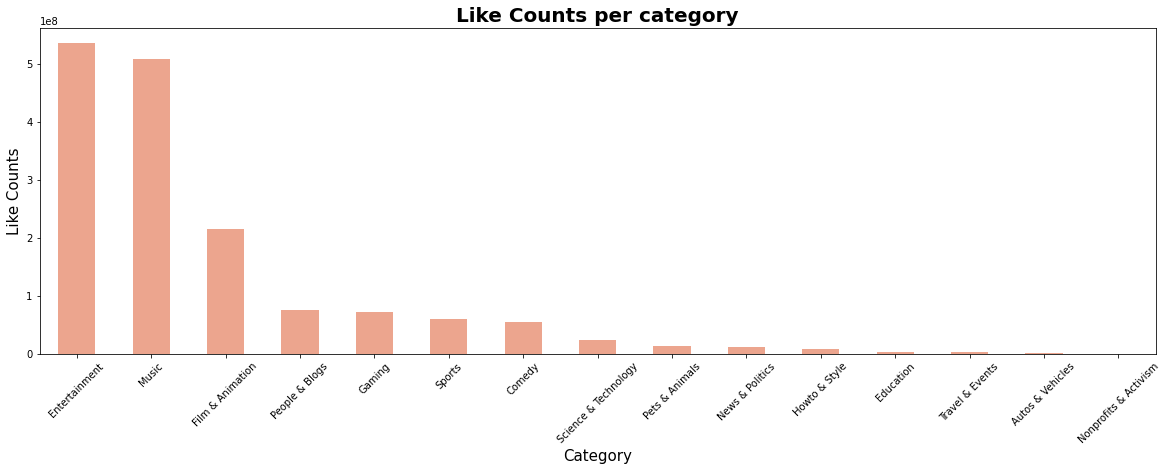

In [26]:
# generate bar plot
like_count["Like Count"].plot(kind='bar', figsize=(20, 6),color = 'darksalmon', alpha = 0.85)
#rotate x-axis ticks vertically
plt.xticks(fontsize = 10,rotation=45)
plt.yticks(fontsize = 10,rotation=0)
plt.title("Like Counts per category",fontsize = 20, fontweight = "bold")
plt.xlabel("Category",fontsize = 15)
plt.ylabel("Like Counts",fontsize = 15)
plt.rc('font', **{'size':'15'})

# save fig
plt.savefig("Images/Like count per category.png")
# display fig
plt.show()

* ## Comment count per category

In [27]:
# create dataframe sorted by comment counts
comment_count = category_grouping.sort_values("Comment Count", ascending=False)
# comment_count = category_grouping.nlargest(10, "Comment Count")
comment_count

,View Count,Like Count,Comment Count,% View Count,% Like Count,% Comment Count
category,,,,,,
Music,10160411510,508013936.0,18702820.0,31.305946,31.976967,38.404625
Entertainment,9288456046,535794015.0,13779840.0,28.619303,33.725585,28.295711
Gaming,1110358453,71930175.0,4254473.0,3.421202,4.527649,8.736193
People & Blogs,1548932469,76105761.0,3962830.0,4.772523,4.790482,8.137329
Film & Animation,5611784056,216047447.0,2155865.0,17.290855,13.599119,4.426883
Sports,1690103561,59911865.0,2093969.0,5.207495,3.771156,4.299784
Science & Technology,412137771,24706776.0,1420553.0,1.269866,1.555169,2.916983
News & Politics,352451457,12468381.0,1256229.0,1.085963,0.784823,2.579558
Comedy,1474027074,55607520.0,646987.0,4.541727,3.500219,1.328532


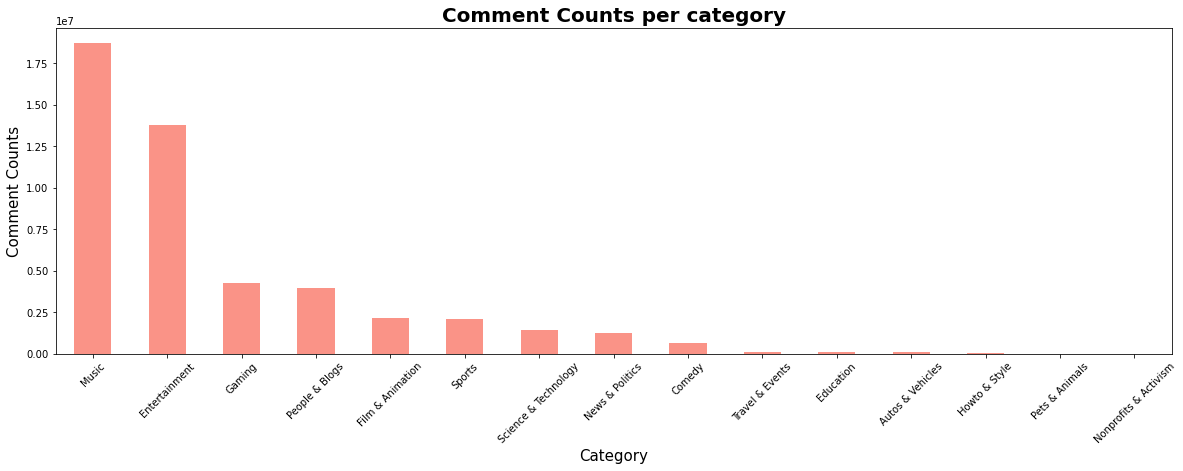

In [30]:
# generate bar plot
comment_count["Comment Count"].plot(kind='bar', figsize=(20, 6),color = 'salmon', alpha = 0.85)

#rotate x-axis ticks vertically
plt.xticks(fontsize = 10,rotation=45)
plt.yticks(fontsize = 10,rotation=0)
plt.title("Comment Counts per category",fontsize = 20, fontweight = "bold")
plt.xlabel("Category",fontsize = 15)
plt.ylabel("Comment Counts",fontsize = 15)
plt.rc('font', **{'size':'15'})

# save fig
plt.savefig("Images/Comment count per category.png")
# display fig
plt.show()

* ## % view count per category

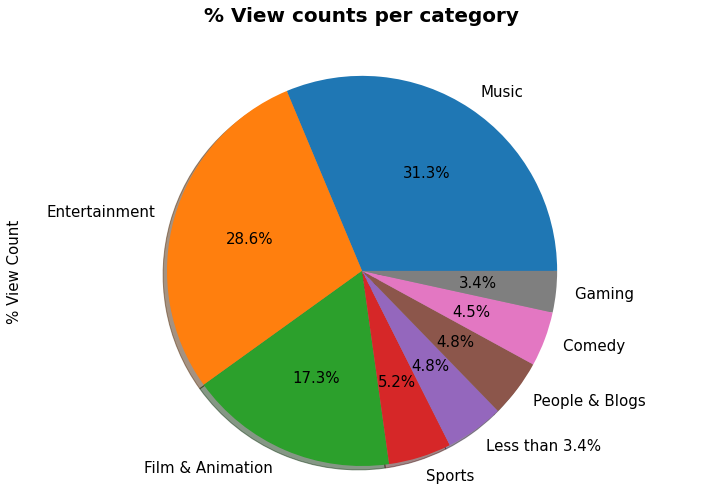

In [31]:
# (percentage_view_count["% View Count"])
percent_view_count = {"category": ["Music" ,"Entertainment" ,"Film & Animation "        ,"Sports  "                  
,"People & Blogs"            
,"Comedy "                   
,"Gaming "                   
,"Less than 3.4%" ], "% View Count": [31.305946, 28.619303, 17.290855, 5.207495,4.772523, 4.541727, 3.421202,4.84095]   }


percent_view_count = pd.DataFrame(percent_view_count)
percent_view_count


grouping = percent_view_count.groupby(["category"]).sum()[["% View Count"]]
grouping


percentage_view_count2 = grouping.sort_values("% View Count", ascending=False)
percentage_view_count2

# generate pie chart
percentage_view_count2["% View Count"].plot(kind='pie',autopct="%1.1f%%",shadow=True,figsize=(12, 8))
plt.axis('equal')
plt.title("% View counts per category",fontsize = 20, fontweight = "bold", pad = 32)

# save fig
plt.savefig("Images/% View count per category.png")
# display fig
plt.show()


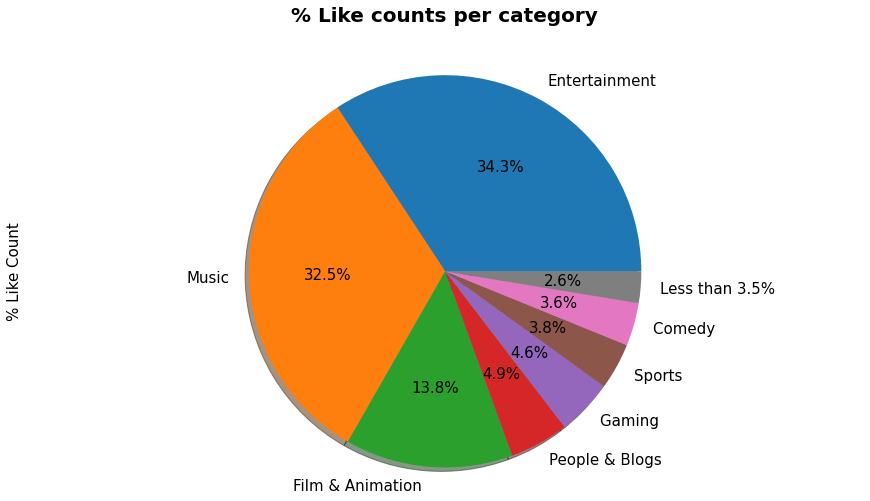

In [32]:
# like_count = category_grouping.sort_values("Like Count", ascending=False)
# like_count["% Like Count"]

percent_like_count = {"category": ["Entertainment" ,"Music" ,"Film & Animation "        ,"People & Blogs", "Gaming " ,"Sports  " ,                 
           "Comedy "                   
,                  "Less than 3.5%" ], "% Like Count": [33.725585,31.976967,13.599119,4.790482,4.527649,3.771156,3.500219,2.5536550000000005]   }

# a = (0.815475,0.784823,0.480729,0.179773,0.154986,0.137821,0.000048)
# sum(a)
percent_like_count = pd.DataFrame(percent_like_count)
percent_like_count


grouping = percent_like_count.groupby(["category"]).sum()[["% Like Count"]]
grouping


percentage_like_count2 = grouping.sort_values("% Like Count", ascending=False)
percentage_like_count2

# generate pie chart
percentage_like_count2["% Like Count"].plot(kind='pie',autopct="%1.1f%%",shadow=True,figsize=(15, 8))
plt.axis('equal')
plt.title("% Like counts per category",fontsize = 20, fontweight = "bold", pad = 32)

# save fig
plt.savefig("Images/% Like count per category.png")
# display fig
plt.show()

* ## % comment count per category

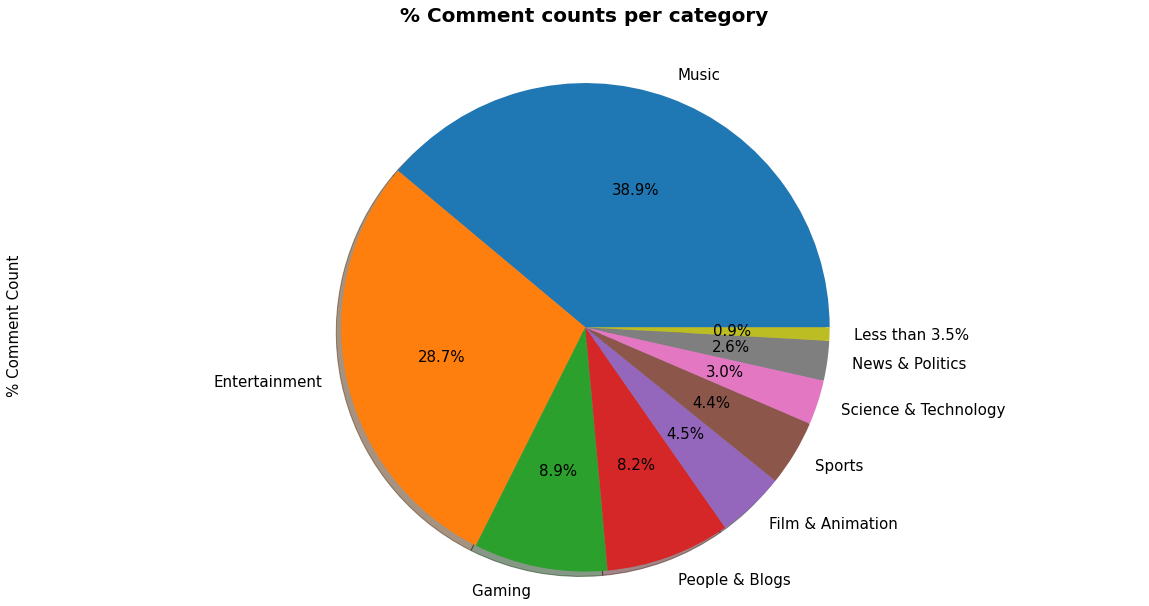

In [33]:
# comment_count = category_grouping.sort_values("Comment Count", ascending=False)
# comment_count["% Comment Count"]

percent_like_count = {"category": ["Music" ,"Entertainment", "Gaming ","People & Blogs", "Film & Animation "  ,"Sports  " ,  "Science & Technology"  , "News & Politics"            
                 ,                  "Less than 3.5%" ], "% Comment Count": [38.404625,28.295711,8.736193,8.137329,4.426883,4.299784,2.916983,2.579558,0.874404]   }

# # a = (0.296384,0.223284,0.210208,0.119511,0.024442,0.000575)
# # sum(a)
percent_like_count = pd.DataFrame(percent_like_count)
percent_like_count


grouping = percent_like_count.groupby(["category"]).sum()[["% Comment Count"]]
grouping


percentage_like_count2 = grouping.sort_values("% Comment Count", ascending=False)
percentage_like_count2

# generate pie chart
percentage_like_count2["% Comment Count"].plot(kind='pie',autopct="%1.1f%%",shadow=True,figsize=(20, 10))
plt.axis('equal')
plt.title("% Comment counts per category",fontsize = 20, fontweight = "bold", pad = 32)

# save fig
plt.savefig("Images/% Comment count per category.png")
# display fig
plt.show()

## Correlation between view counts and like counts

* ## By country

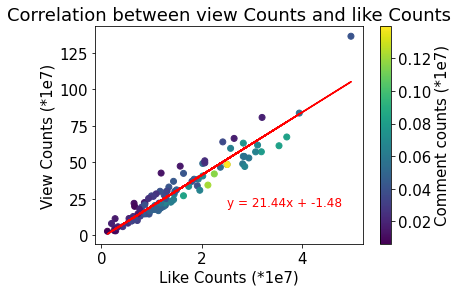

The correlation coefficient between view counts and like counts is 0.95


In [35]:
# Calculate the correlation coefficient and linear regression model 

y = country_grouping["View Count"]/10000000
x = country_grouping["Like Count"]/10000000
z = country_grouping["Comment Count"]/10000000

#calculate the regression line/regress values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot scatter
plt.scatter(x, y, c=z)
clb = plt.colorbar()
plt.title("Correlation between view Counts and like Counts")
plt.xlabel("Like Counts (*1e7)")
plt.ylabel("View Counts (*1e7)")
clb.set_label("Comment counts (*1e7)")
#plot line
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(2.5,20),fontsize=12,color="red")

# save fig
plt.savefig("Images/correlation based on country.png")
# display fig
plt.show()

#print correlation coefficient
print(f"The correlation coefficient between view counts and like counts is {round(st.pearsonr(x,y)[0],2)}")

In [36]:
# Calculate Independent (like vs view) t-test
st.ttest_ind(x, y, equal_var=False)

Ttest_indResult(statistic=-14.378040379039064, pvalue=7.103944229700154e-27)

In [37]:
# Calculate Independent (like vs comment) t-test
st.ttest_ind(x, z, equal_var=False)

Ttest_indResult(statistic=16.234795288087415, pvalue=9.214256114659033e-31)

In [38]:
# Calculate Independent (view vs comment) t-test
st.ttest_ind(y, z, equal_var=False)

Ttest_indResult(statistic=15.11012645730653, pvalue=2.1231246602632023e-28)

* ## By category

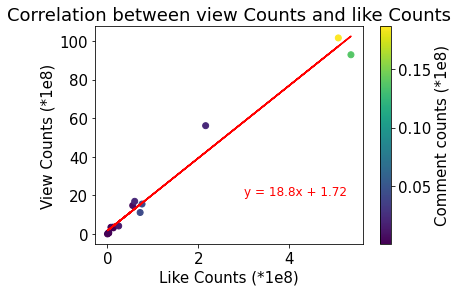

The correlation coefficient between view counts and like counts is 0.99


In [39]:
# Calculate the correlation coefficient and linear regression model 

y = category_grouping["View Count"]/100000000
x = category_grouping["Like Count"]/100000000
z = category_grouping["Comment Count"]/100000000

#calculate the regression line/regress values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot scatter
plt.scatter(x, y, c=z)
clb = plt.colorbar()
plt.title("Correlation between view Counts and like Counts")
plt.xlabel("Like Counts (*1e8)")
plt.ylabel("View Counts (*1e8)")
clb.set_label("Comment counts (*1e8)")
#plot line
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(3,20),fontsize=12,color="red")

# save fig
plt.savefig("Images/correlation based on category.png")
# display fig
plt.show()

#print correlation coefficient
print(f"The correlation coefficient between view counts and like counts is {round(st.pearsonr(x,y)[0],2)}")

In [40]:
# Calculate Independent (like vs view) t-test
st.ttest_ind(x, y, equal_var=False)

Ttest_indResult(statistic=-2.354521200702324, pvalue=0.0335824124887686)

In [41]:
# Calculate Independent (like vs comment) t-test
st.ttest_ind(x, z, equal_var=False)

Ttest_indResult(statistic=2.236159580722224, pvalue=0.0421042930827023)

In [42]:
# Calculate Independent (view vs comment) t-test
st.ttest_ind(y, z, equal_var=False)

Ttest_indResult(statistic=2.4754039847440383, pvalue=0.02670465256888274)

## ANOVA testing

* ## by country

In [58]:
# check if like counts are significantly different among differnt countries
country = data_df['Country Name'].unique()

st.f_oneway(*(data_df[data_df['Country Name'] == cn]['Like Count'] for cn in country))

F_onewayResult(statistic=3.6050731056080316, pvalue=7.403698275134119e-32)

In [106]:
# box plot from top 10 countries
# data_df.loc[["Cambodia", "Malaysia","New Zealand","Ireland","Sri Lanka","Norway","Portugal","Singapore","Finland","Sweden"]]

plot_df = data_df.loc[data_df['Country Name'].isin(["Cambodia", "Malaysia","New Zealand","Ireland","Sri Lanka","Norway","Portugal","Singapore","Finland","Sweden"])]
plot_df.head()

,Region,Category ID,Made For Kids,Channel IDs,View Count,Like Count,Comment Count,Country Name,Region ID,category
1525,IE,24,False,UCX6OQ3DkcsbYNE6H8uQQuVA,35696197,2299298.0,79603.0,Ireland,IE,Entertainment
1526,IE,10,False,UCANLZYMidaCbLQFWXBC95Jg,31448953,1925867.0,60569.0,Ireland,IE,Music
1527,IE,10,False,UCqECaJ8Gagnn7YCbPEzWH6g,42004056,1990566.0,7631.0,Ireland,IE,Music
1528,IE,24,False,UCvC4D8onUfXzvjTOM-dBfEA,16155641,797865.0,32165.0,Ireland,IE,Entertainment
1529,IE,24,False,UCDogdKl7t7NHzQ95aEwkdMw,7651655,513378.0,16630.0,Ireland,IE,Entertainment


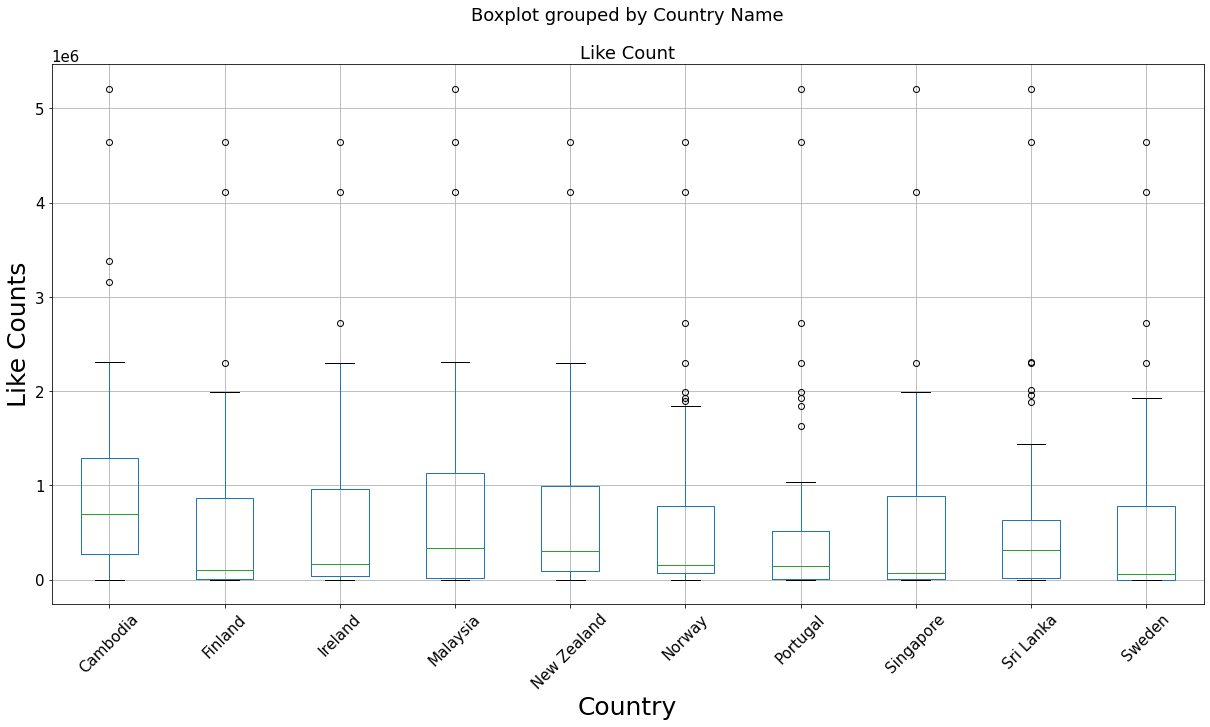

In [114]:
plot_df.boxplot("Like Count", by="Country Name", figsize=(20, 10))
plt.xticks(fontsize = 15,rotation=45)
# plt.title("Box plot grouped by country",fontsize = 60, fontweight = "bold")
plt.xlabel("Country",fontsize = 25)
plt.ylabel("Like Counts",fontsize = 25)

# save fig
plt.savefig("Images/Box plot grouped by top ten countries.png")
# display fig
plt.show()

In [115]:
# randomly select 10 rows from dataframe
plot2_df = data_df.sample(n = 5)
plot2_df

# plot2_df.boxplot("Like Count", by="Country Name", figsize=(70, 30))
# plt.xticks(fontsize = 10,rotation=45)
# # plt.title("Box plot grouped by country",fontsize = 60, fontweight = "bold")
# plt.xlabel("Country",fontsize = 45)
# plt.ylabel("Like Counts",fontsize = 45)
# plt.xticks(fontsize = 45)
# # save fig
# plt.savefig("Images/final_Box plot grouped by country.png")
# # display fig
# plt.show()

# # save fig
# plt.savefig("Images/Backup_Box plot grouped by country.png")
# # display fig
# plt.show()

,Region,Category ID,Made For Kids,Channel IDs,View Count,Like Count,Comment Count,Country Name,Region ID,category
2746,NI,17,False,UCTv-XvfzLX3i4IGWAm4sbmA,3013665,67840.0,1474.0,Nicaragua,NI,Sports
2648,HN,24,False,UCNAhW2oJvy_FUU082pEDspA,5720097,269161.0,17185.0,Honduras,HN,Entertainment
1714,JM,22,False,UCRXJaBvhynZMqVCbHVkzkNw,237035,5389.0,461.0,Jamaica,JM,People & Blogs
4838,TH,24,False,UCPKm2L511pjnPTI60mcZbXw,167958,7037.0,442.0,Thailand,TH,Entertainment
1755,KE,10,False,UCKzR_v8dQlyrZ_zRMcFsQBA,505494,13911.0,4443.0,Kenya,KE,Music


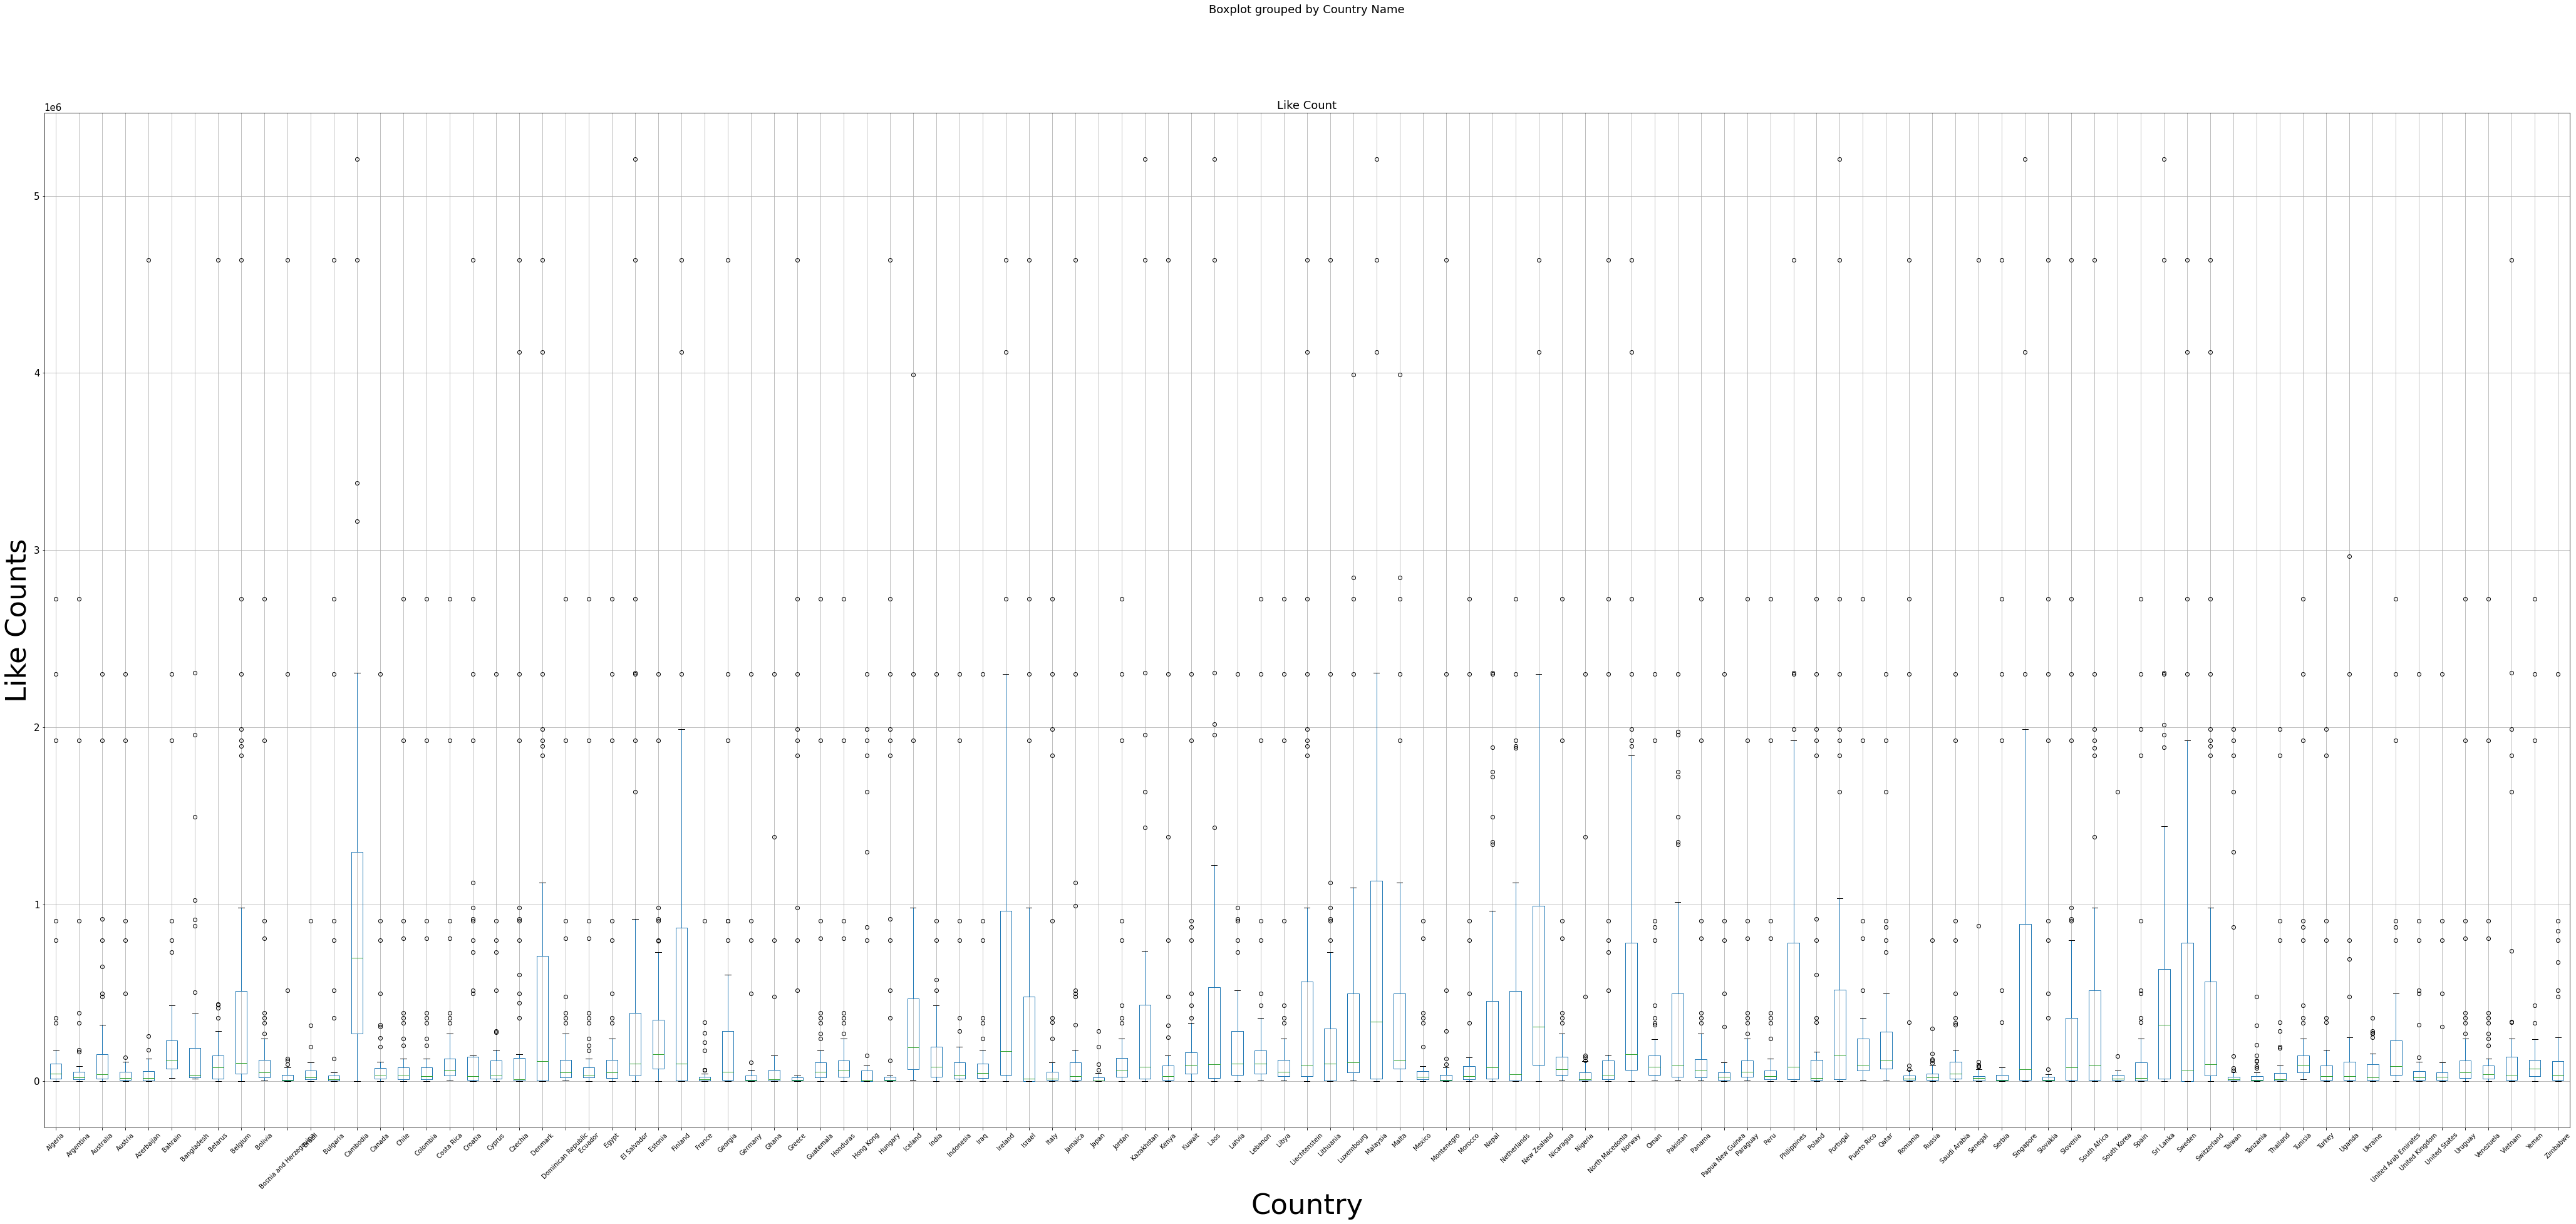

In [116]:
# backup boxplot from all countries
data_df.boxplot("Like Count", by="Country Name", figsize=(70, 30))
plt.xticks(fontsize = 10,rotation=45)
# plt.title("Box plot grouped by country",fontsize = 60, fontweight = "bold")
plt.xlabel("Country",fontsize = 45)
plt.ylabel("Like Counts",fontsize = 45)

# save fig
plt.savefig("Images/Backup_Box plot grouped by country.png")
# display fig
plt.show()

* ## by category

In [60]:
# check if like counts are significantly different among differnt categories
category = data_df['category'].unique()

st.f_oneway(*(data_df[data_df['category'] == cg]['Like Count'] for cg in category))

F_onewayResult(statistic=36.102642288288195, pvalue=2.9209956568816213e-94)

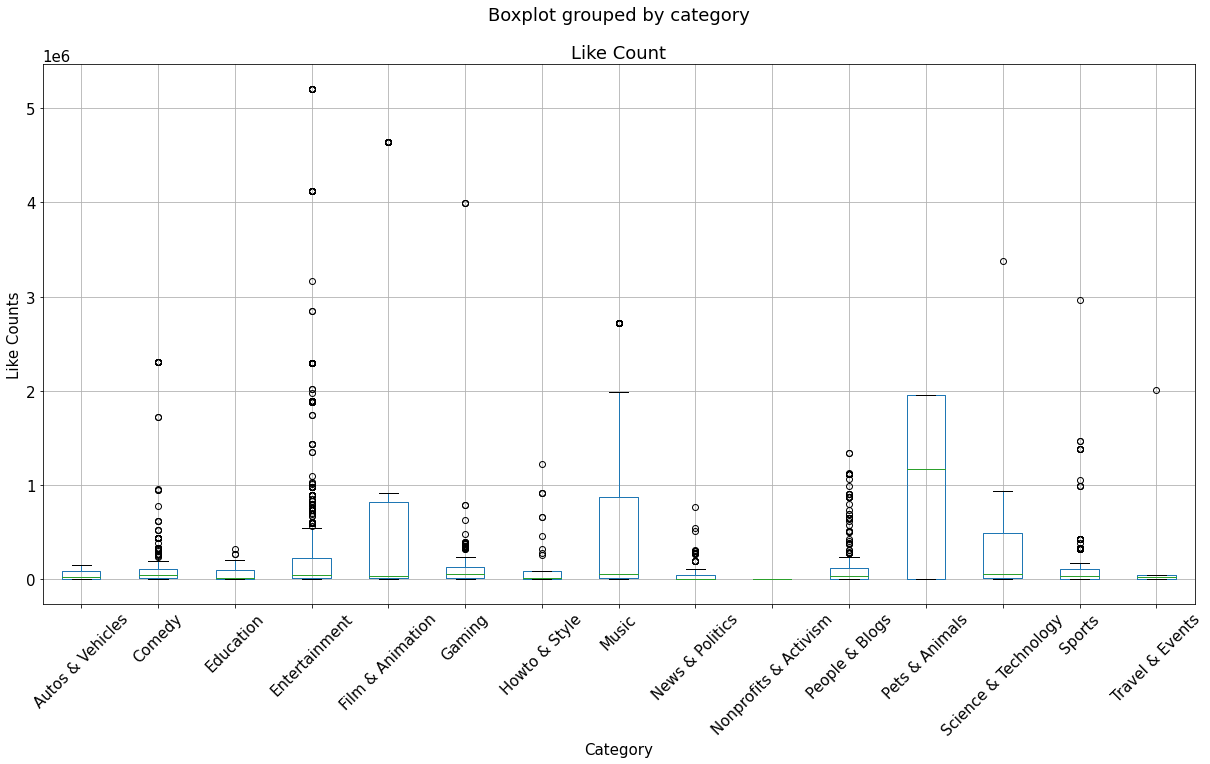

In [62]:
data_df.boxplot("Like Count", by="category", figsize=(20, 10))
# plt.title("Box plot grouped by category",fontsize = 20, fontweight = "bold")
plt.xlabel("Category",fontsize = 15)
plt.ylabel("Like Counts",fontsize = 15)
plt.xticks(rotation = 45)
# save fig
plt.savefig("Images/Box plot grouped by category.png")
# display fig
plt.show()